## 深度卷积神经网络（AlexNet）

在早期的计算机视觉中，往往是先对图片数据进行处理，提取出不同的特征信息，然后将提取的特征信息放到自己喜欢的分类其中，以训练分类器。在2012年前，图像特征都是机械的计算出来的，设计一套新的特征函数，改进结果，并撰写论文是当时的潮流。

当时也由另一组研究人员，他们认为特征本身应该被学习，他们还认为，在合理的复杂性前提下，特征应该由多个共同学习的神经网络层组成，每个层都有可学习的参数。其中Alex Knzhevsky等人提出了一种新的卷积神经网络变体AlexNet，并在2012年的ImageNet挑战赛中取得了轰动一时的成绩。

在网络的底层，模型学习到了一些类似于传统滤波器的特征抽取器：

![](https://zh-v2.d2l.ai/_images/filters.png)


深度卷积神经网络的突破出现在2012年，归功于两个关键因素：

- 数据

  2009年ImageNet数据集发布，并发起ImageNet挑战赛，要求研究人员从100万个样本中训练模型，以区分1000个不同类别的对象。ImageNet数据集由斯坦福教授李飞飞小组的研究人员开发，利用谷歌图像搜索对每一类图像进行预筛选，并利用亚马逊众包来标注每张图片的相关类别。

- 硬件

  深度学习对计算资源要求很高，GPU的早年用来加速图像处理，使电脑玩家收益，GPU可优化4 $\times$ 4矩阵和向量乘法，这和卷积层的运算非常相似，而AlexNet的作者意识到卷积神经网络的计算瓶颈：卷积和矩阵乘法，都是可以在硬件上并行的操作，于是他们使用了两个显存为3G的NVIDIA GTX580 GPU实现了快速卷积运算。


## AlexNet

下图是LeNet和AlexNet的对比，其中AlexNet是精简版的，去除了两个小型GPU同时运算的设计。

![](https://zh-v2.d2l.ai/_images/alexnet.svg)


AlexNet比LeNet要深的多，AlexNet由5个卷积层和3个全连接层组成，其中AlexNet使用ReLU而不是Sigmoid作为其激活函数。

### 模型设计

AlexNet的第一层采用11$\times$11的卷积核，这是因为ImageNet的图像的高宽比MNIST图像多10倍以上，需要一个更大的卷积核来捕获目标，第二层是5$\times$5，然后是3$\times$3。

其外在第一层、第二层、第五层卷积层之后，加入窗口为3$\times$3的池化层，而且AlexNet的通道数也是LeNet的10倍。

### 激活函数

Sigmoid函数的输出接近0或1时，梯度值几乎等于0，因此反向传播无法继续更新一些参数，相反ReLU激活函数在正区间的梯度总是1。

### 容量控制和预处理

AlexNet通过dropout控制了全连接层的复杂度，为了进一步扩充数据，AlexNet在训练时增加了大量的图像增强数据，如旋转、裁剪和变色，更大的样本是模型更健壮，同时减少了过拟合。




In [2]:
!nvidia-smi

Mon Jul 19 12:49:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [14]:
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(4096, 10), nn.ReLU() # 这里使用Fashion-MNIST数据集，因此输入为10
)

In [16]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'Output shape:\t', X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1,

loss 0.328, train acc 0.881, test acc 0.880
1458.5 examples/sec on cuda:0


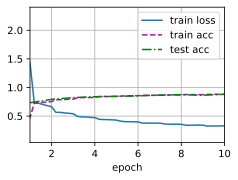

In [17]:
batch_size = 128
# Fashion-MNIST数据集中的图片分辨率为(28, 28)，因此需要resize
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())
# 8m55s